<a href="https://colab.research.google.com/github/CengARY/DataGlacier_Healthcare_Persistency_of_a_drug/blob/main/Drug_Persistency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_excel('Healthcare_dataset.xlsx', sheet_name='Dataset')
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [8]:
# dataframe shape
print(df.shape)
# checking for duplicates
print(df.Ptid.unique().shape)

(3424, 69)
(3424,)


In [9]:
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

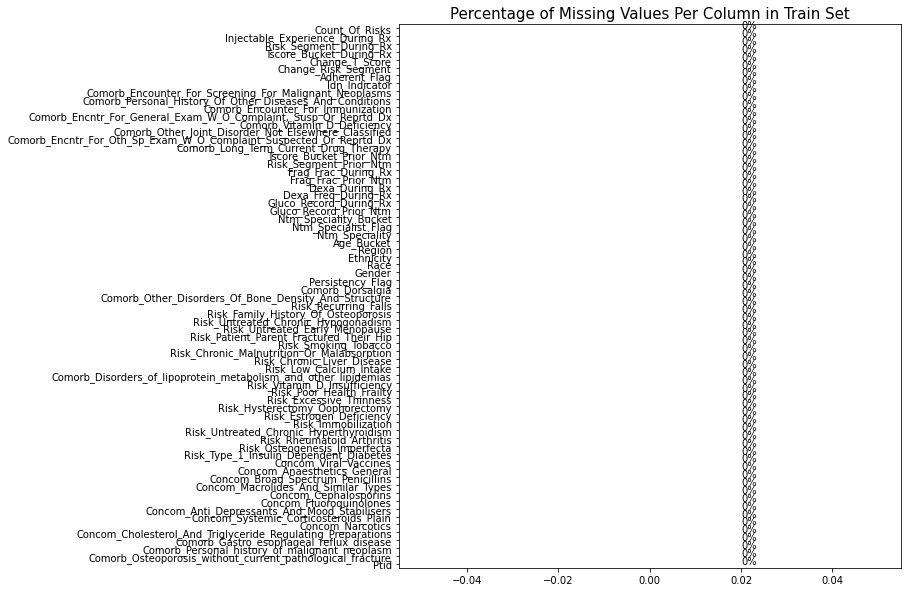

In [11]:
ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [12]:
df.drop(['Ptid'], axis=1, inplace=True)
df.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,1


In [13]:
df.dtypes

Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
Region                            object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 68, dtype: object

In [14]:
cat_cols = list(df.select_dtypes(['object']).columns)
print(len(cat_cols))
cat_cols

66


['Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure'

In [15]:
num_cols = list(df.select_dtypes(['int64']).columns)
print(len(num_cols))
num_cols

2


['Dexa_Freq_During_Rx', 'Count_Of_Risks']

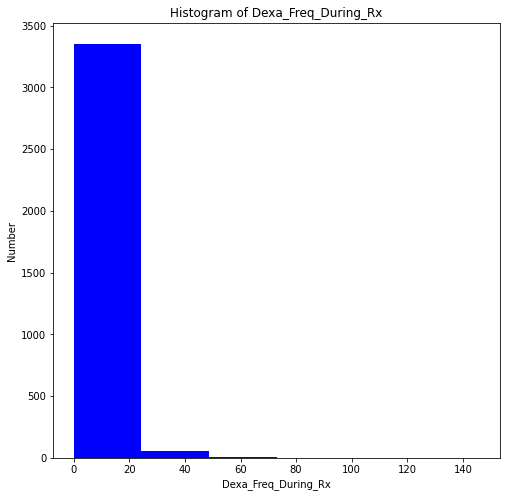

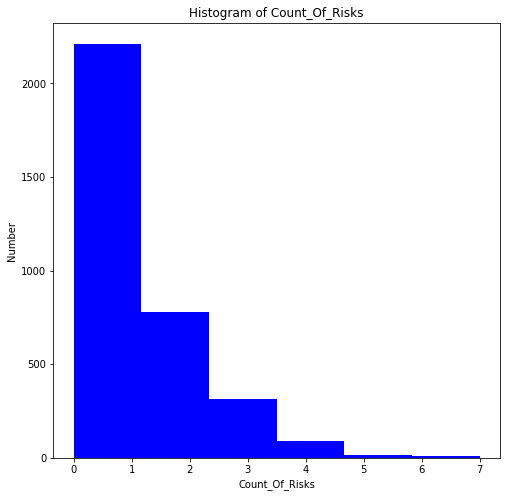

In [16]:
def plot_histogram(df, cols, bins=6):
    for col in cols:
        fig = plt.figure(figsize=(8,8))
        ax= fig.gca()
        df[col].plot.hist(ax = ax, bins = bins, color = 'blue')
        ax.set_title('Histogram of ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number')
        plt.show()
plot_histogram(df, num_cols)

In [17]:
def count_value(df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts())
count_value(df, cat_cols)


For column Persistency_Flag
Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64

For column Gender
Female    3230
Male       194
Name: Gender, dtype: int64

For column Race
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64

For column Ethnicity
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64

For column Region
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64

For column Age_Bucket
>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64

For column Ntm_Speciality
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                          

Persistency_Flag


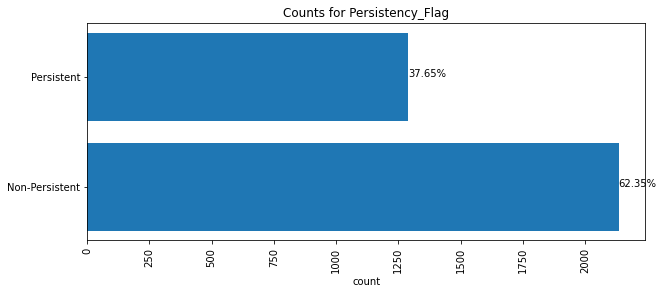

Gender


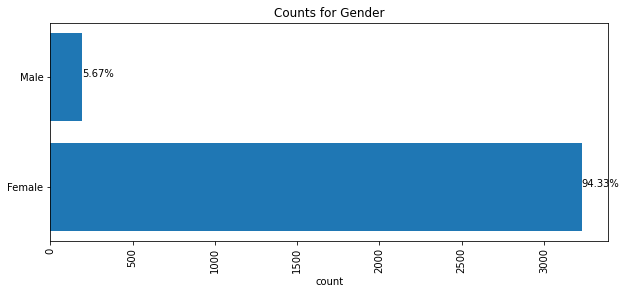

Race


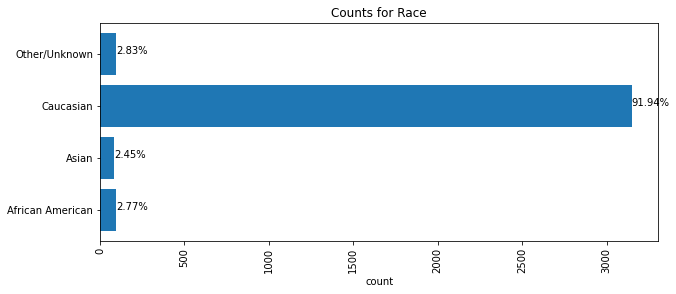

Ethnicity


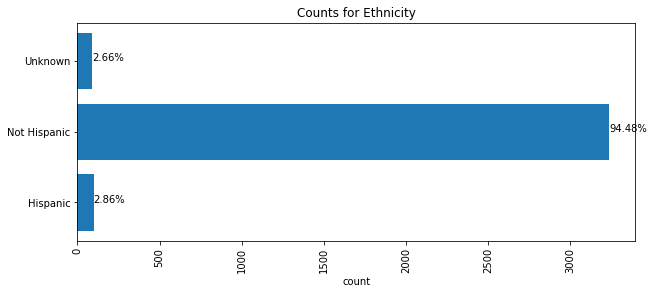

Region


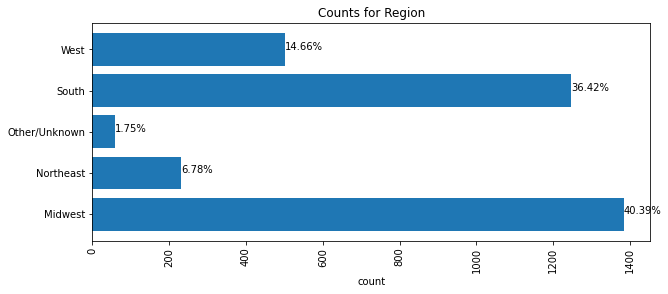

Age_Bucket


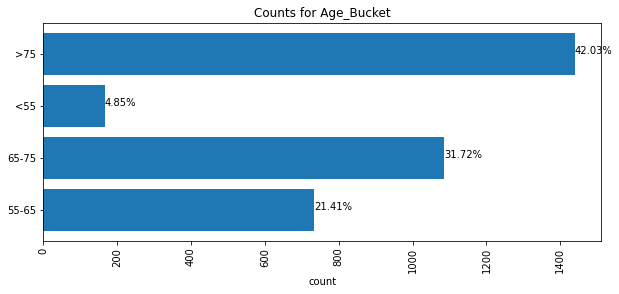

Ntm_Speciality


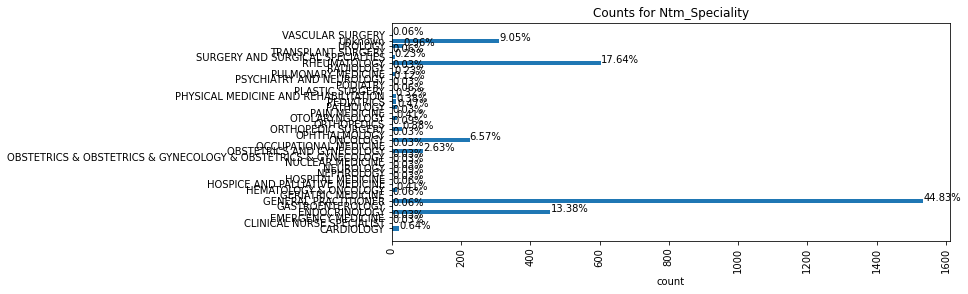

Ntm_Specialist_Flag


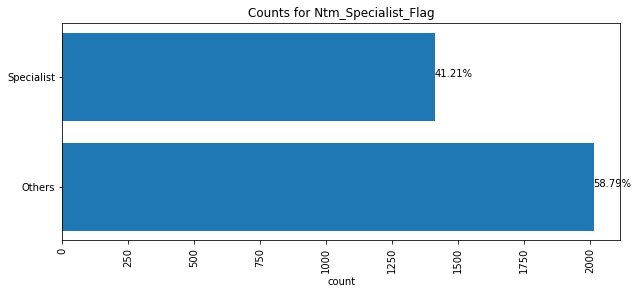

Ntm_Speciality_Bucket


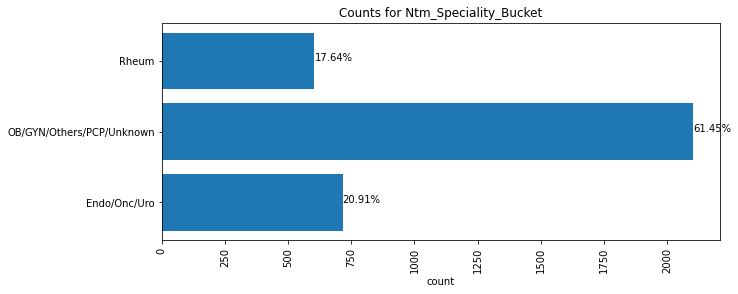

Gluco_Record_Prior_Ntm


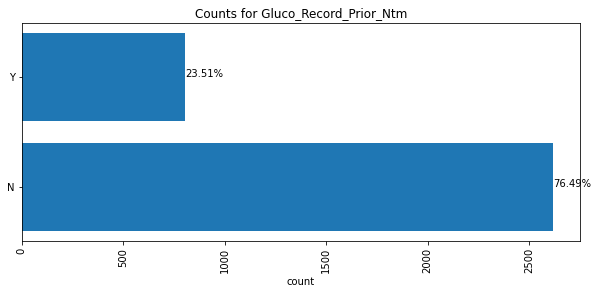

Gluco_Record_During_Rx


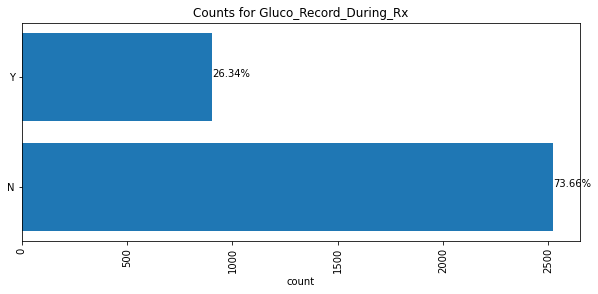

Dexa_During_Rx


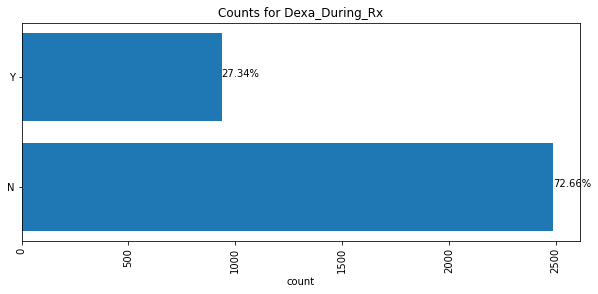

Frag_Frac_Prior_Ntm


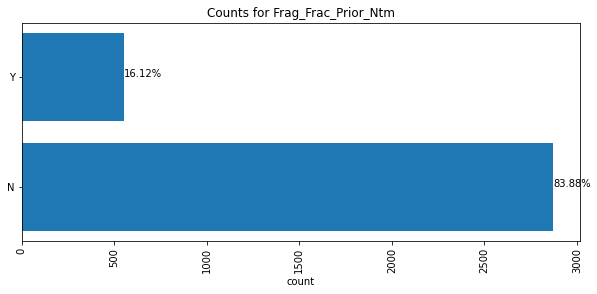

Frag_Frac_During_Rx


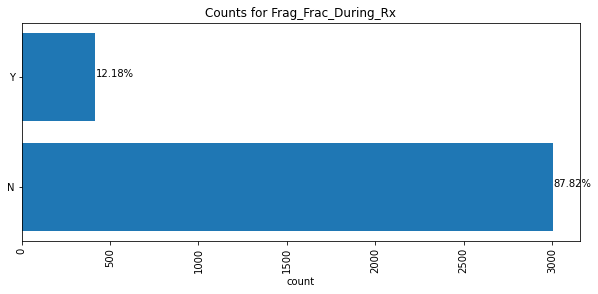

Risk_Segment_Prior_Ntm


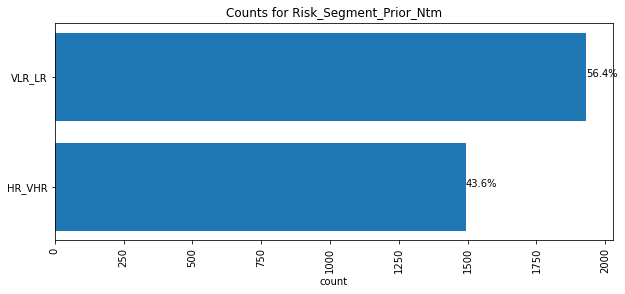

Tscore_Bucket_Prior_Ntm


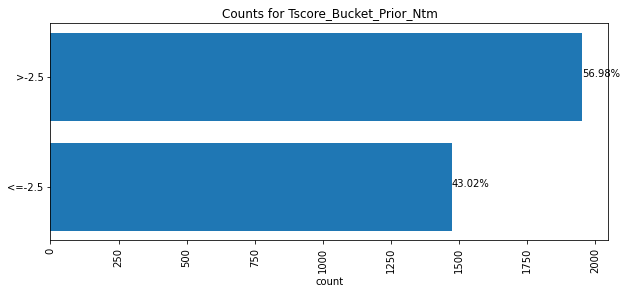

Risk_Segment_During_Rx


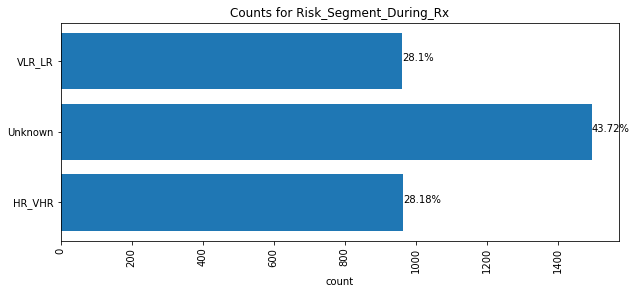

Tscore_Bucket_During_Rx


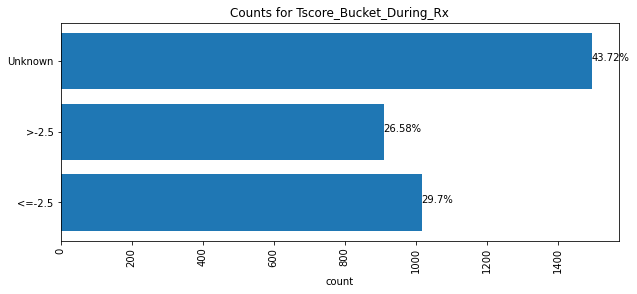

Change_T_Score


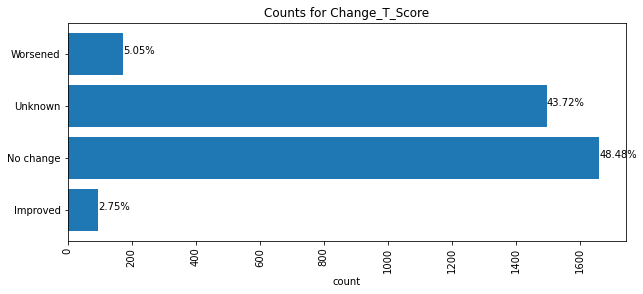

Change_Risk_Segment


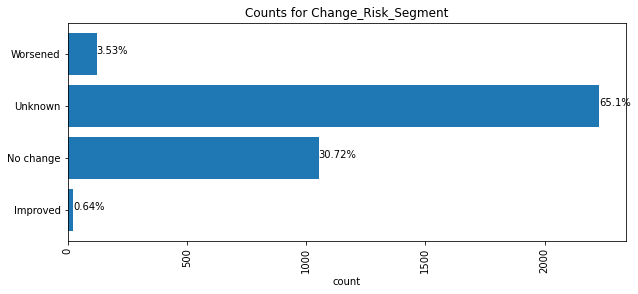

Adherent_Flag


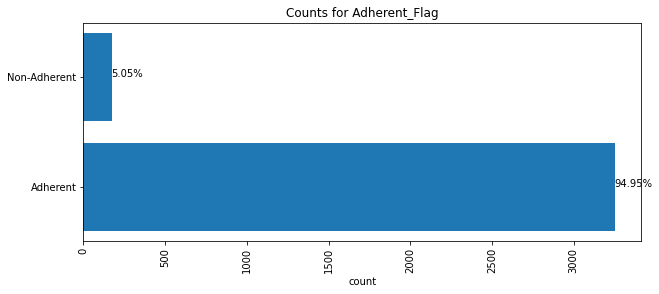

Idn_Indicator


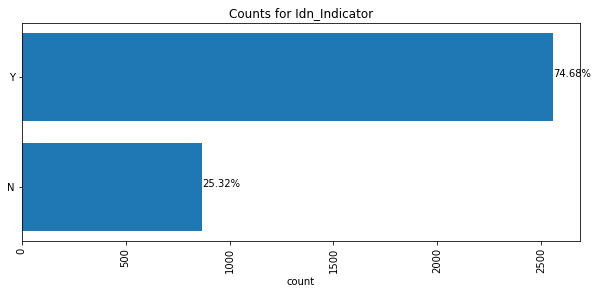

Injectable_Experience_During_Rx


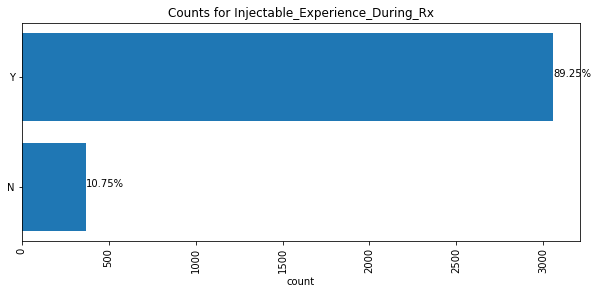

Comorb_Encounter_For_Screening_For_Malignant_Neoplasms


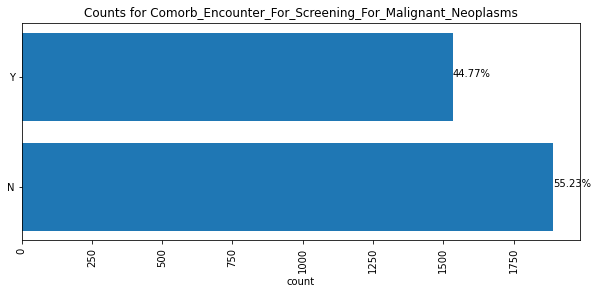

Comorb_Encounter_For_Immunization


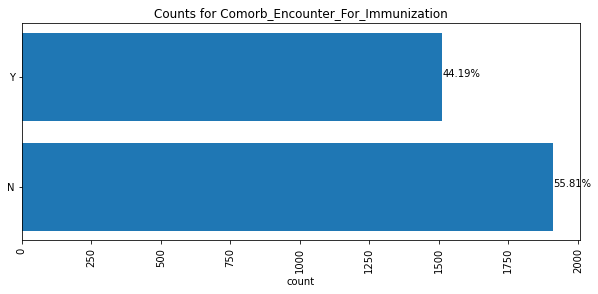

Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx


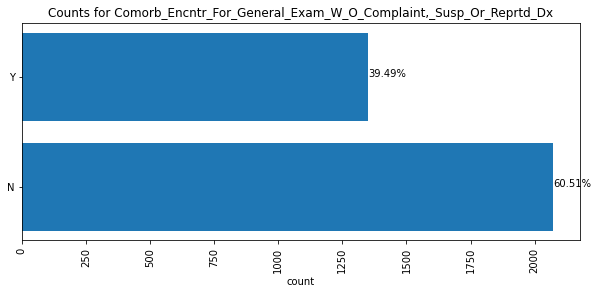

Comorb_Vitamin_D_Deficiency


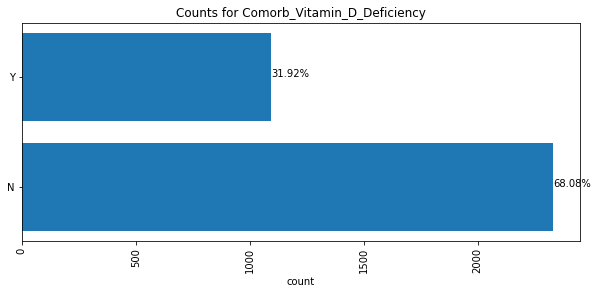

Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified


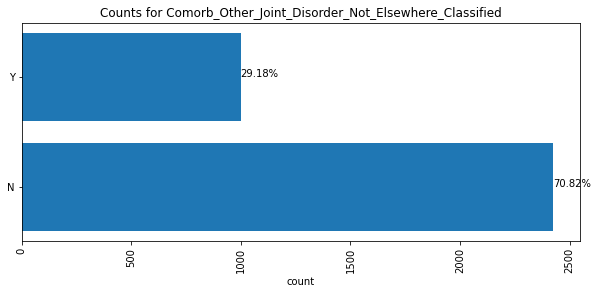

Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx


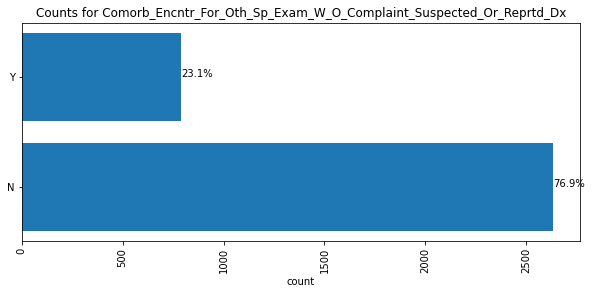

Comorb_Long_Term_Current_Drug_Therapy


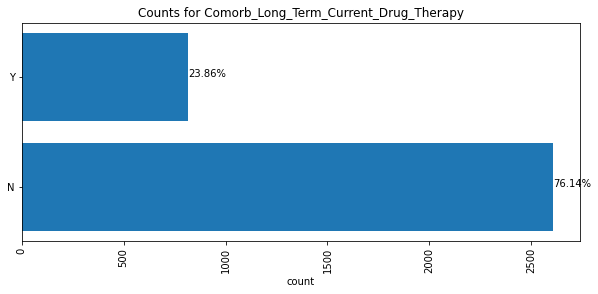

Comorb_Dorsalgia


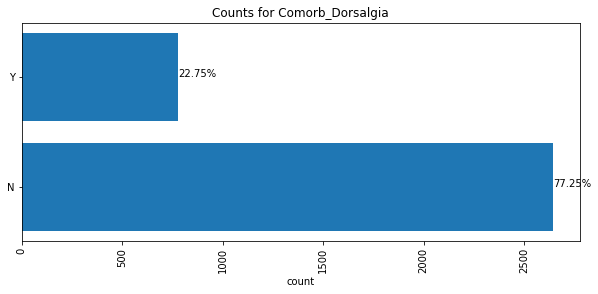

Comorb_Personal_History_Of_Other_Diseases_And_Conditions


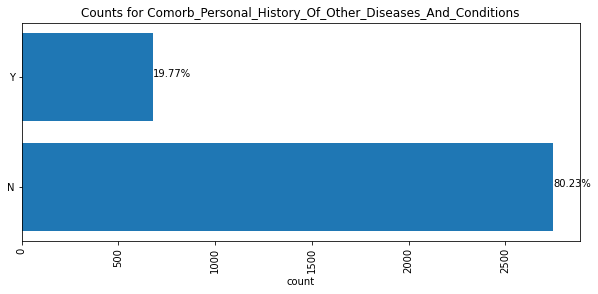

Comorb_Other_Disorders_Of_Bone_Density_And_Structure


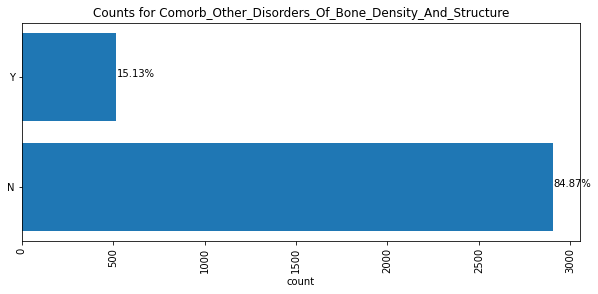

Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias


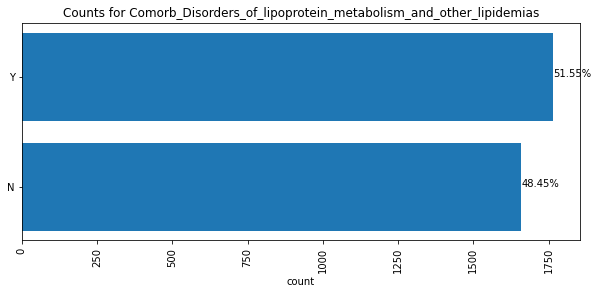

Comorb_Osteoporosis_without_current_pathological_fracture


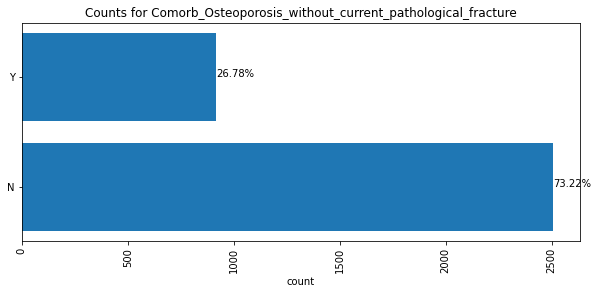

Comorb_Personal_history_of_malignant_neoplasm


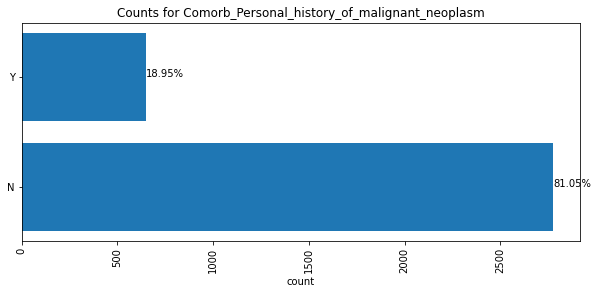

Comorb_Gastro_esophageal_reflux_disease


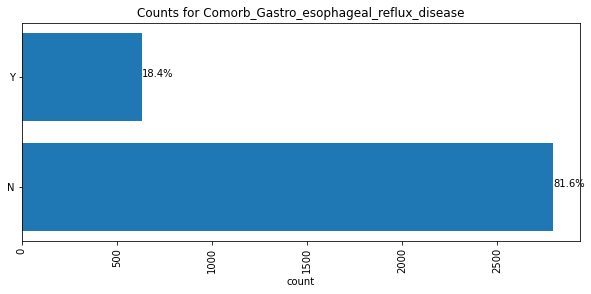

Concom_Cholesterol_And_Triglyceride_Regulating_Preparations


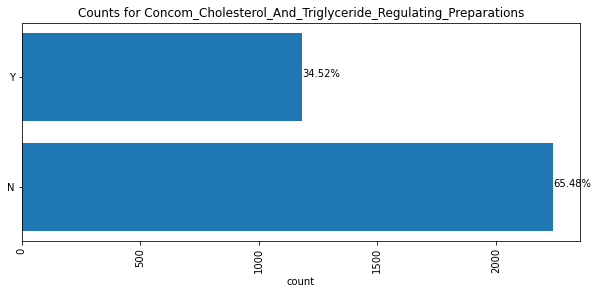

Concom_Narcotics


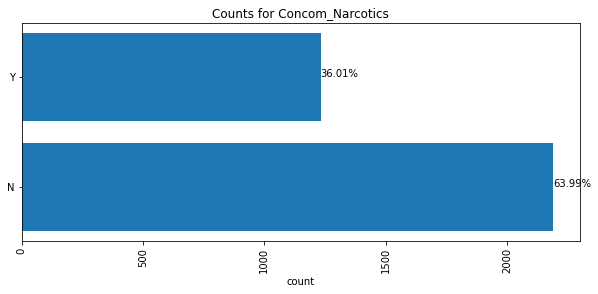

Concom_Systemic_Corticosteroids_Plain


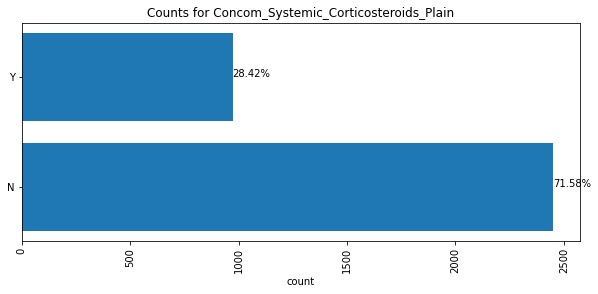

Concom_Anti_Depressants_And_Mood_Stabilisers


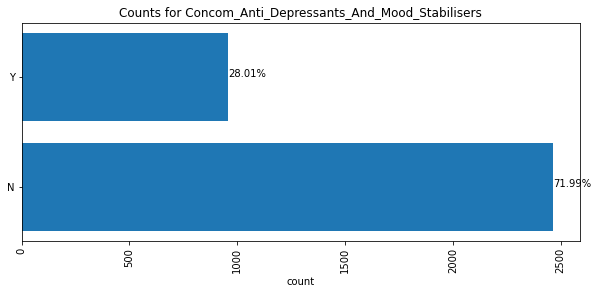

Concom_Fluoroquinolones


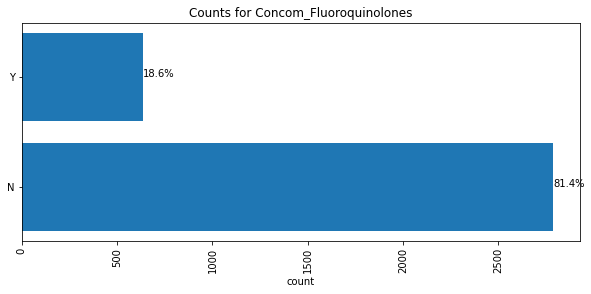

Concom_Cephalosporins


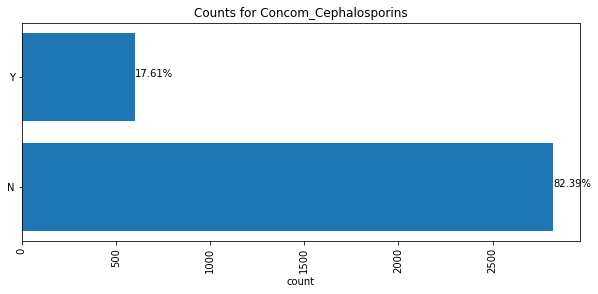

Concom_Macrolides_And_Similar_Types


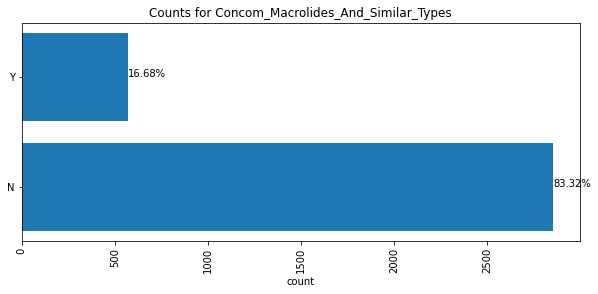

Concom_Broad_Spectrum_Penicillins


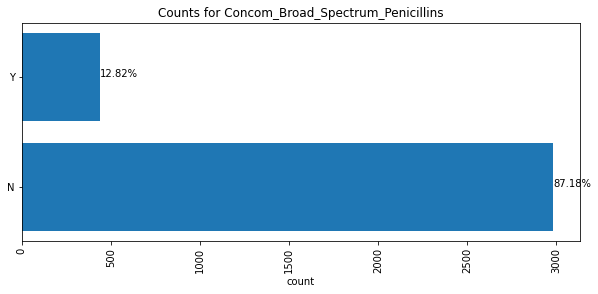

Concom_Anaesthetics_General


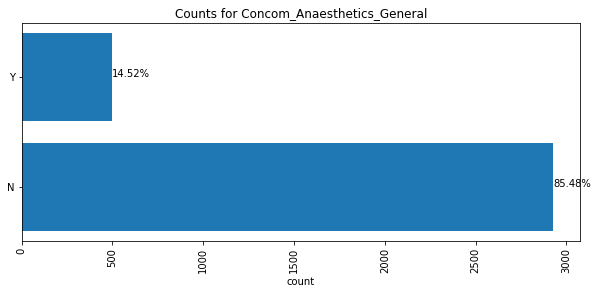

Concom_Viral_Vaccines


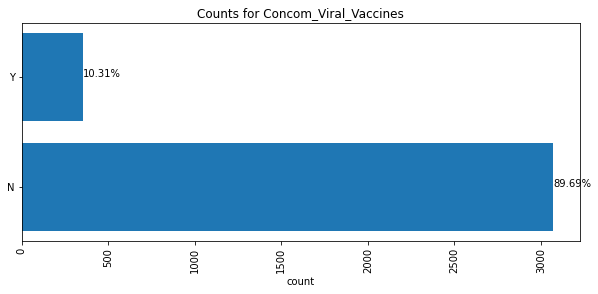

Risk_Type_1_Insulin_Dependent_Diabetes


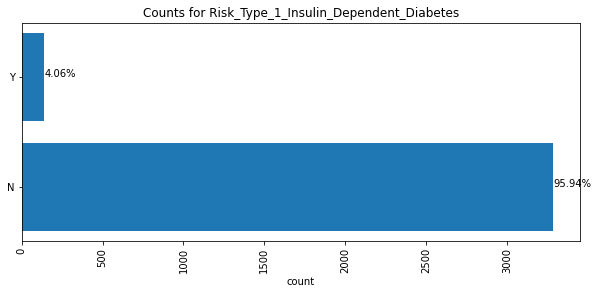

Risk_Osteogenesis_Imperfecta


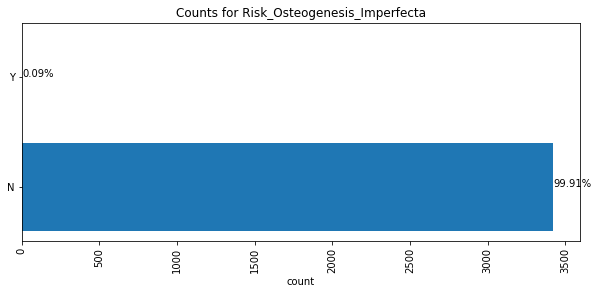

Risk_Rheumatoid_Arthritis


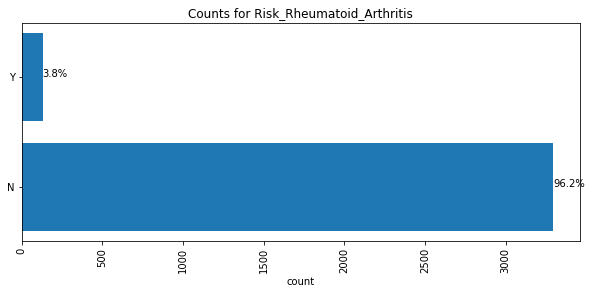

Risk_Untreated_Chronic_Hyperthyroidism


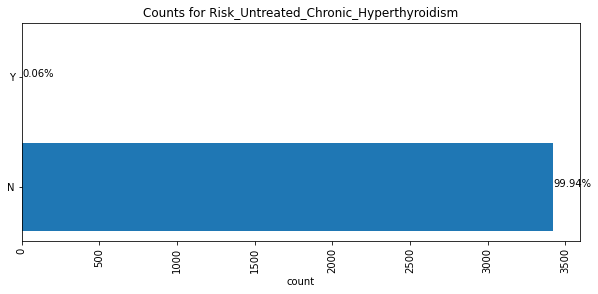

Risk_Untreated_Chronic_Hypogonadism


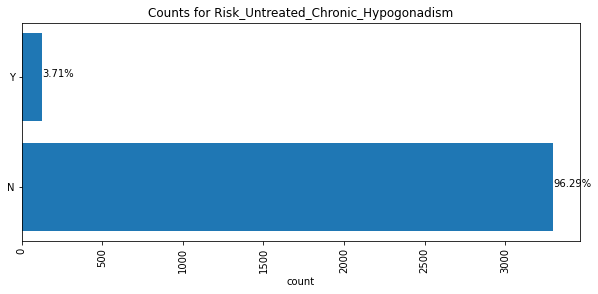

Risk_Untreated_Early_Menopause


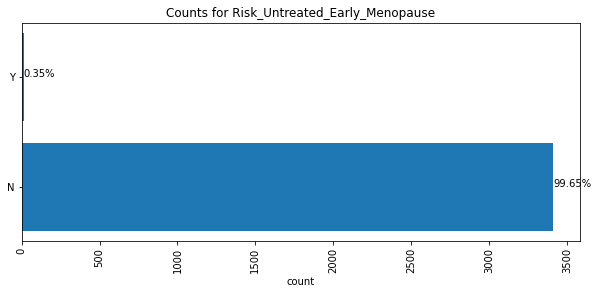

Risk_Patient_Parent_Fractured_Their_Hip


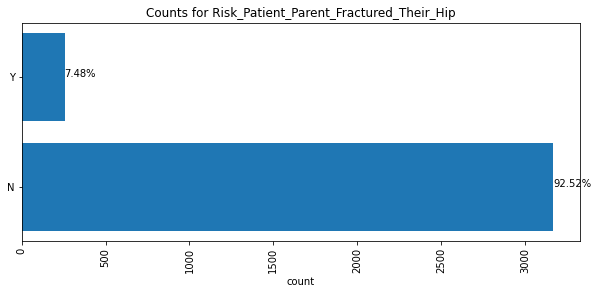

Risk_Smoking_Tobacco


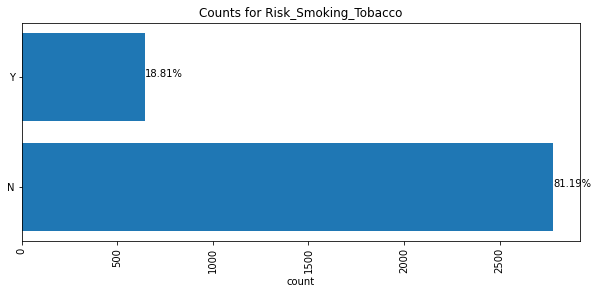

Risk_Chronic_Malnutrition_Or_Malabsorption


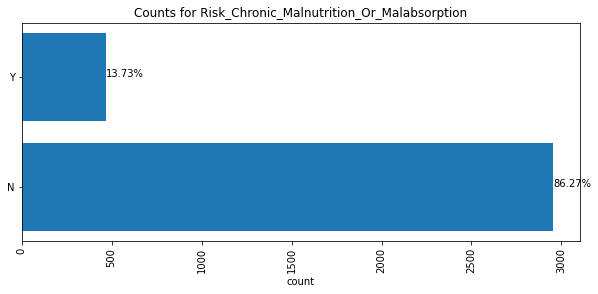

Risk_Chronic_Liver_Disease


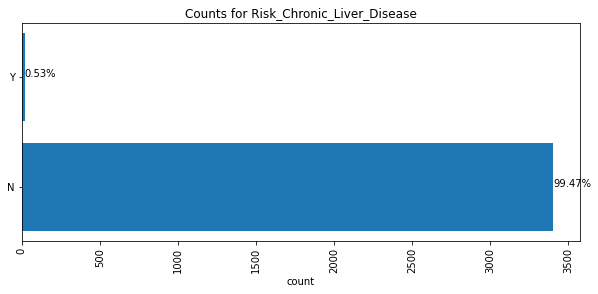

Risk_Family_History_Of_Osteoporosis


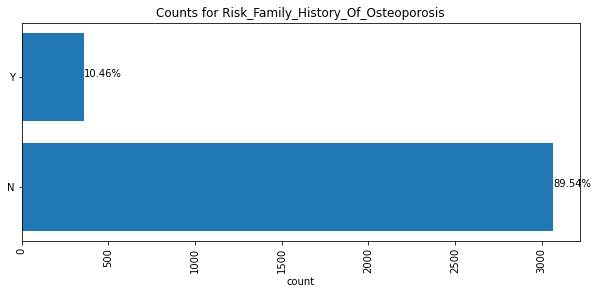

Risk_Low_Calcium_Intake


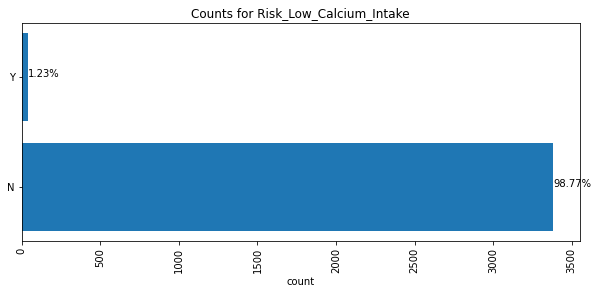

Risk_Vitamin_D_Insufficiency


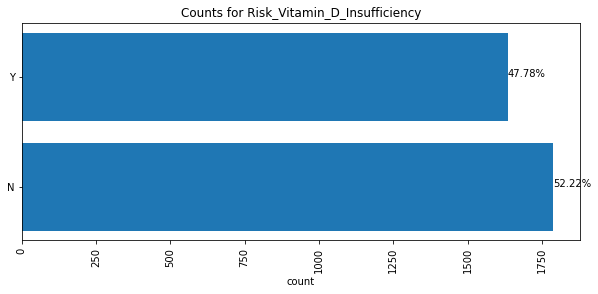

Risk_Poor_Health_Frailty


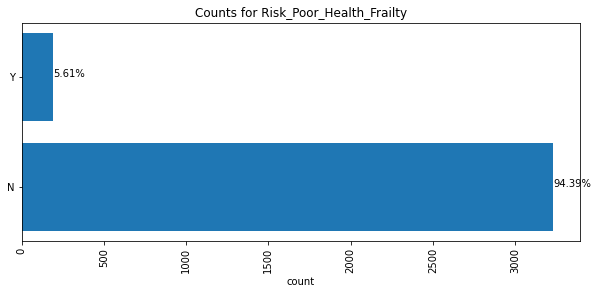

Risk_Excessive_Thinness


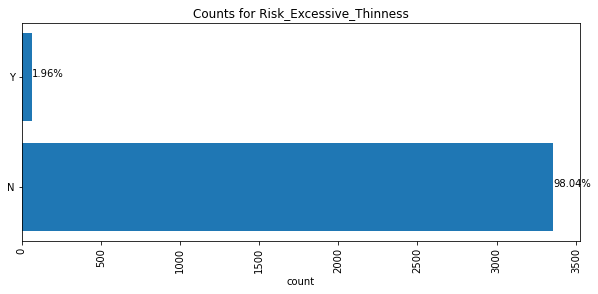

Risk_Hysterectomy_Oophorectomy


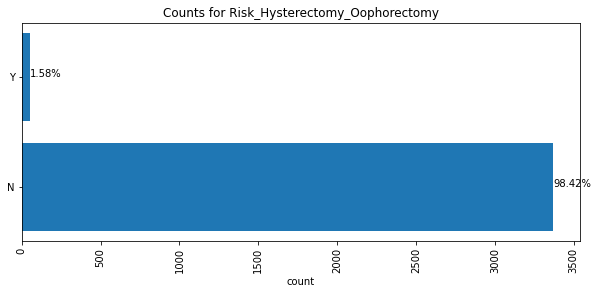

Risk_Estrogen_Deficiency


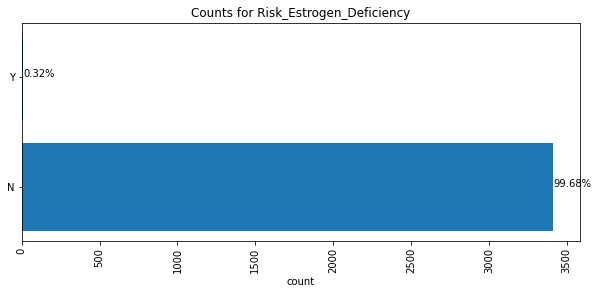

Risk_Immobilization


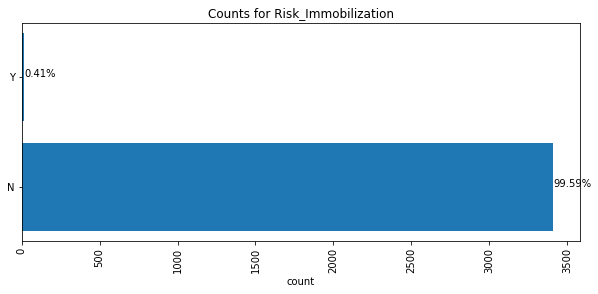

Risk_Recurring_Falls


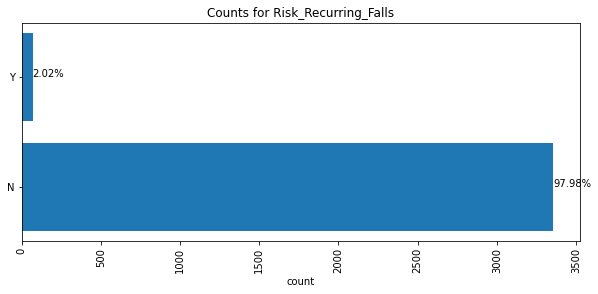

In [18]:
def plot_catcols(x, df):
    df['dummy'] = np.ones(shape = df.shape[0])
    for col in x:
        print(col)
        counts = df[['dummy', col]].groupby([col], as_index = False).count()
        fig, ax = plt.subplots(figsize = (10,4))
        graph = plt.barh(counts[col], counts.dummy) #creating a graph
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col)
        plt.xlabel('count')
        #getting percentages
        total = counts['dummy'].sum()
        percentage = []
        for i in range(counts.shape[0]):
            pct = (counts.dummy[i]/total)*100
            percentage.append(round(pct, 2))
        counts['Percentage'] = percentage
        # plotting the graph with percentages
        i = 0
        for p in graph:
            pct = f'{percentage[i]}%'
            width1, height1 =p.get_width(),p.get_height()
            x1 =p.get_x()+width1
            y1=p.get_y()+height1/2
            ax.annotate(pct,(x1,y1))
            i+=1
        plt.show()
plot_catcols(cat_cols, df)

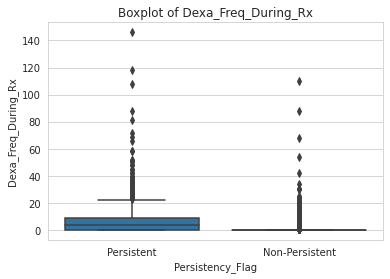

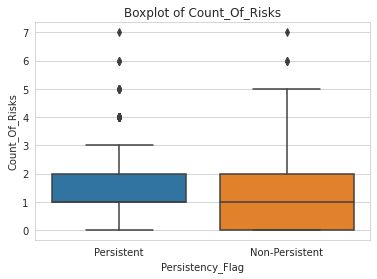

In [19]:
def boxplot(df, cols):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(x='Persistency_Flag', y=col, data=df)
        plt.title('Boxplot of ' + col)
        plt.ylabel(col) #setting text for y axis
        plt.show()
boxplot(df, num_cols)

In [20]:
for col in num_cols:
    print(col)
    Q1=df[col].quantile(0.25) #lower quartile
    Q3=df[col].quantile(0.75) #upper quartile
    IQR=Q3-Q1 #inter-quartile-range
    print(Q1)
    print(Q3)
    print(IQR)
    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    print(Lower_Whisker, Upper_Whisker)
    df = df[df[col]< Upper_Whisker]

Dexa_Freq_During_Rx
0.0
3.0
3.0
-4.5 7.5
Count_Of_Risks
0.0
2.0
2.0
-3.0 5.0


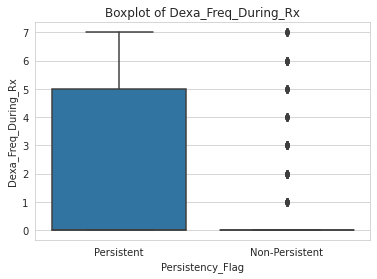

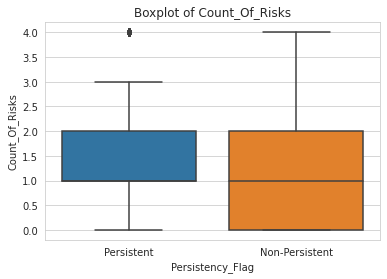

In [21]:
boxplot(df, num_cols)

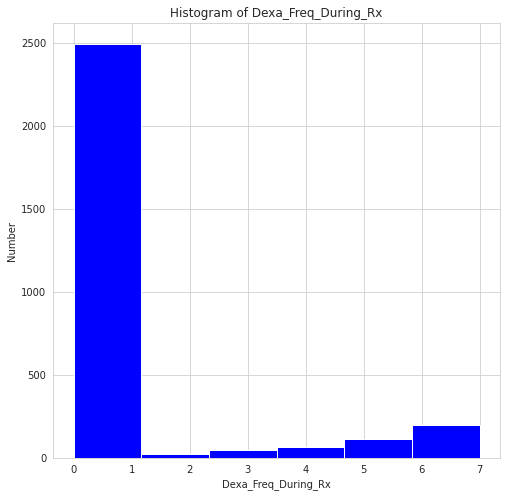

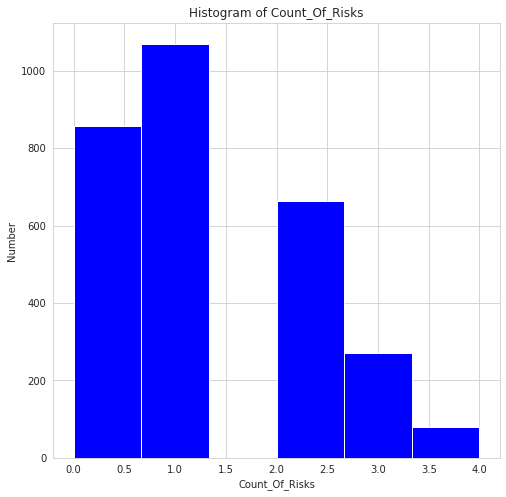

In [22]:
plot_histogram(df, num_cols)